In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Important definitions

### Binary HMM model
The model is fully determined by the following transition probabilities:
$$ p(X_{t_n}=0|X_{t_n}=0) = \alpha, \ \ \ p(X_{t_n}=1|X_{t_n}=1) = \beta .$$

In [92]:
def HMM_step(x_0,alpha,beta):
    # One HMM step in the binary model
    
    # transition matrix for states
    P = np.array([[alpha, 1-alpha], [1-beta, beta]])
    
    if x_0 == 0:
        x_1 = np.random.choice(np.array([0,1],dtype=int),replace=True,p=P[0])
    elif x_0 == 1:
        x_1 = np.random.choice(np.array([0,1],dtype=int),replace=True,p=P[1])
        
    return x_1

In [93]:
def HMM_emit(x,delta):
    # one step emission (noisy channel, random bin flip)
    # delta: error probability
    
    y = np.random.choice(np.array([x,1-x],dtype=int),replace=True,p=[1-delta,delta])
    
    return y

In [94]:
def HMM_filt(p_0,y,alpha,beta,delta):
    
    P_trans = np.array([[alpha, 1-beta], [1-alpha, beta]])
    E_y = np.array([[1-delta,delta],[delta,1-delta]])
    e_Y = E_y[y]
    
    normalization = np.dot(np.transpose(e_Y),np.dot(P_trans,p_0))
    p_1 = np.dot(np.diag(e_Y),np.dot(P_trans,p_0))/normalization
    
    return p_1

## Simulations

Simulate a simple Markov chain:

In [376]:
np.random.seed(4)

alpha = 0.9
beta = 0.9
delta = 0.15
T = 15
X = np.zeros(T,dtype=int) # hidden state, starts at 0
Y = np.zeros(T,dtype=int) # observable
p_hat = np.zeros([T,2])
Y[0] = HMM_emit(X[0],delta)
p_hat[0] = np.array([1,0])
for i in np.arange(1,T):
    X[i] = HMM_step(X[i-1],alpha,beta)
    Y[i] = HMM_emit(X[i],delta)
    p_hat[i] = HMM_filt(p_hat[i-1],Y[i],alpha,beta,delta)

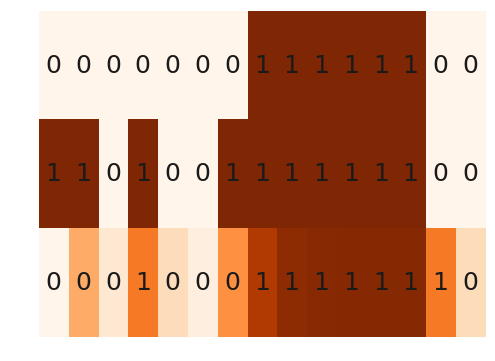

In [378]:
data = np.array([X,Y,np.round(p_hat[:,1])],dtype=int)
fig, ax = plt.subplots()
im = ax.imshow(np.array([X,Y,p_hat[:,1]]),cmap='Oranges',aspect='auto')
fig.set_size_inches(8, 6)
for i in range(len(X)):
    for j in range(3):
        ax.text(i, j, data[j,i],
                       ha="center",  va="center",color="0.1",fontsize=25)
ax.axis('off')
plt.savefig('HMM_trajectory.pdf',bbox_inches='tight')
plt.show()